In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<div style="font-size: 30px">
Overview of Data
</div>

In [71]:
df = pd.read_csv("./heart_disease_data.csv")

In [53]:
# to keep original data Safe
heart_df = df.copy()

In [72]:
# to check the first 5 data samples
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
# DataSet Structure  ==>(rows,columns) 
df.shape

(303, 14)

<div style="font-size: 30px">
   
     Data Cleaning 

</div>

In [56]:
# checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

there is no null value in this data set

In [73]:
# total columns in this data set
total_colums = len(list(df.columns))

this plot shows that each and every columns has proper 303 values  <br>
i.e No null values in any columns

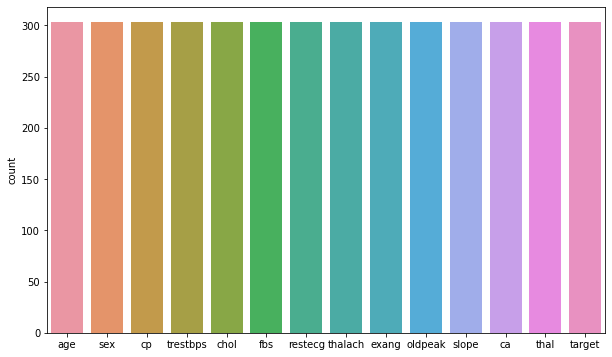

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(df)
plt.show()

duplicate values

In [75]:
len(df[df.duplicated() == True])

1

In [76]:
# there is a only one duplicate values such that
df = df.drop_duplicates()

In [77]:
# checking shape after the deletion of duplicate values
df.shape

(302, 14)

In [78]:
# list of columns
columns = list(df.columns)

In [79]:
print(columns)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Age  ==> Age of person.<br>
Sex ==> gender.<br>
cp ==> Cheast Pain ==> categorized into several types (e.g., typical angina, atypical angina, non-anginal pain, asymptomatic), with numerical encoding.<br>
trestbpd ==> the resting blood pressure (in mm Hg)  ==> measured at the time of admission in hospital.<br>
chol ==> cholesterol level (in mg/dl).<br>
fbs ==> fasting blood sugar level ==>  (> 120 mg/dl is typically considered as high blood sugar).<br>
restecg ==> resting electrocardiographic result ==>  It often includes different states (e.g., normal, ST-T wave abnormality, left ventricular hypertrophy) encoded numerically.<br>
thalach ==> Maximum Heart Rate Achieved During the Exercise Test.<br>
exang ==> Exercise-Induced Angina (1 = Yes; 0 = No).<br>
oldpeak ==> ST Depression Induced by Exercise Relative to Rest.<br>
slope ==> Slope of the Peak Exercise ST Segment.<br>
ca ==> Number of Major Vessels (0-3) Colored by Fluoroscopy.<br>

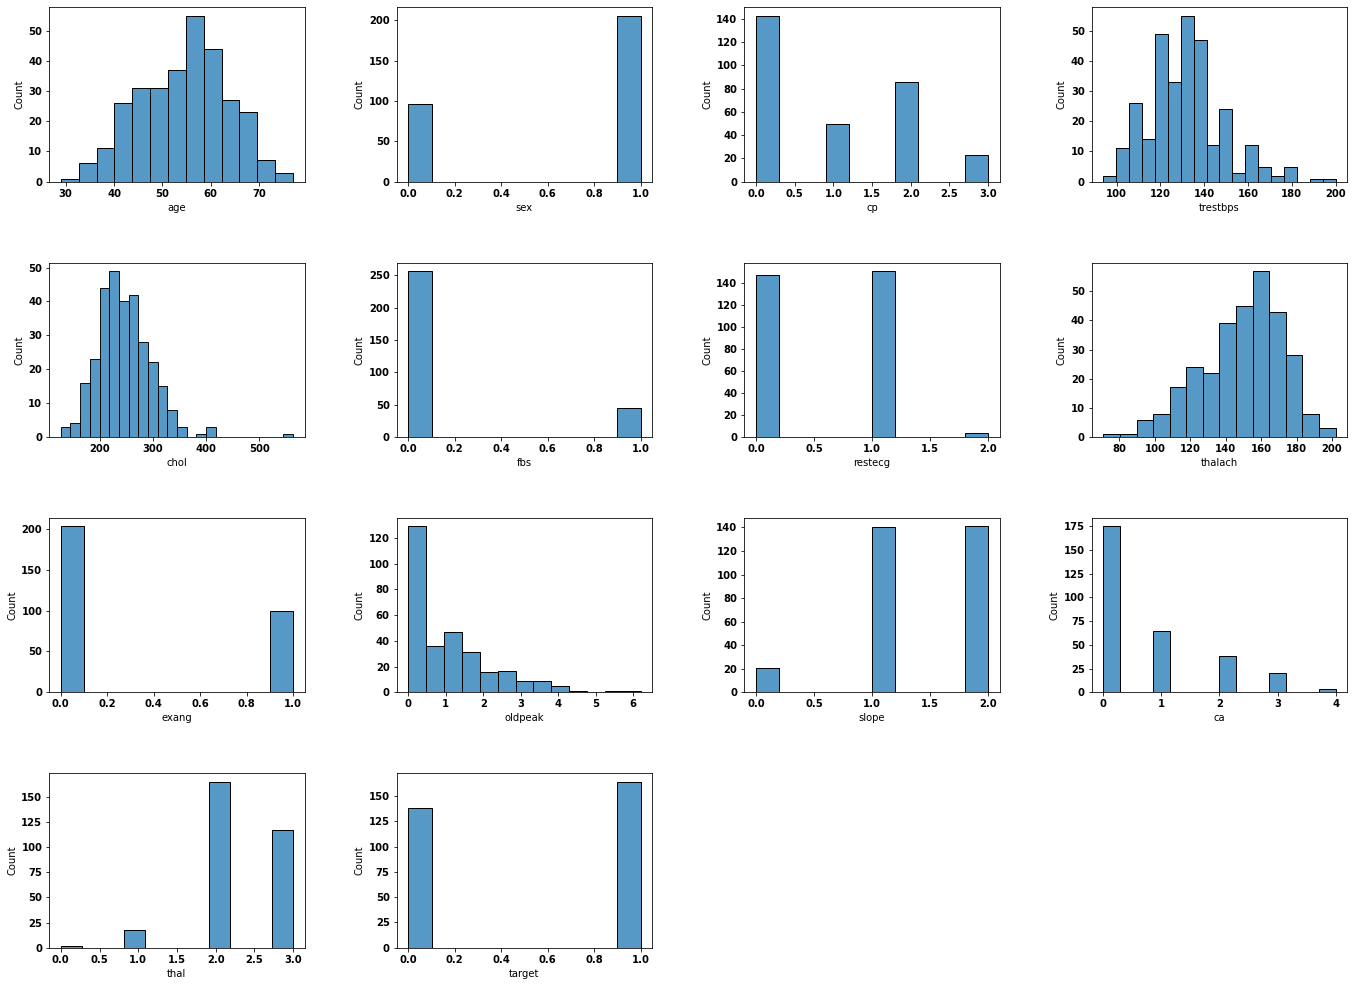

In [80]:
plt.figure(figsize=(20,18))
for count in range(total_colums):
    plt.subplot(5,4,count+1)
    sns.histplot(data = df,x=columns[count])
    ax = plt.gca()
    for tick in ax.get_xticklabels():
        tick.set_fontweight('bold')
    for tick in ax.get_yticklabels():
        tick.set_fontweight('bold')
plt.tight_layout(pad=5.0)
plt.show()

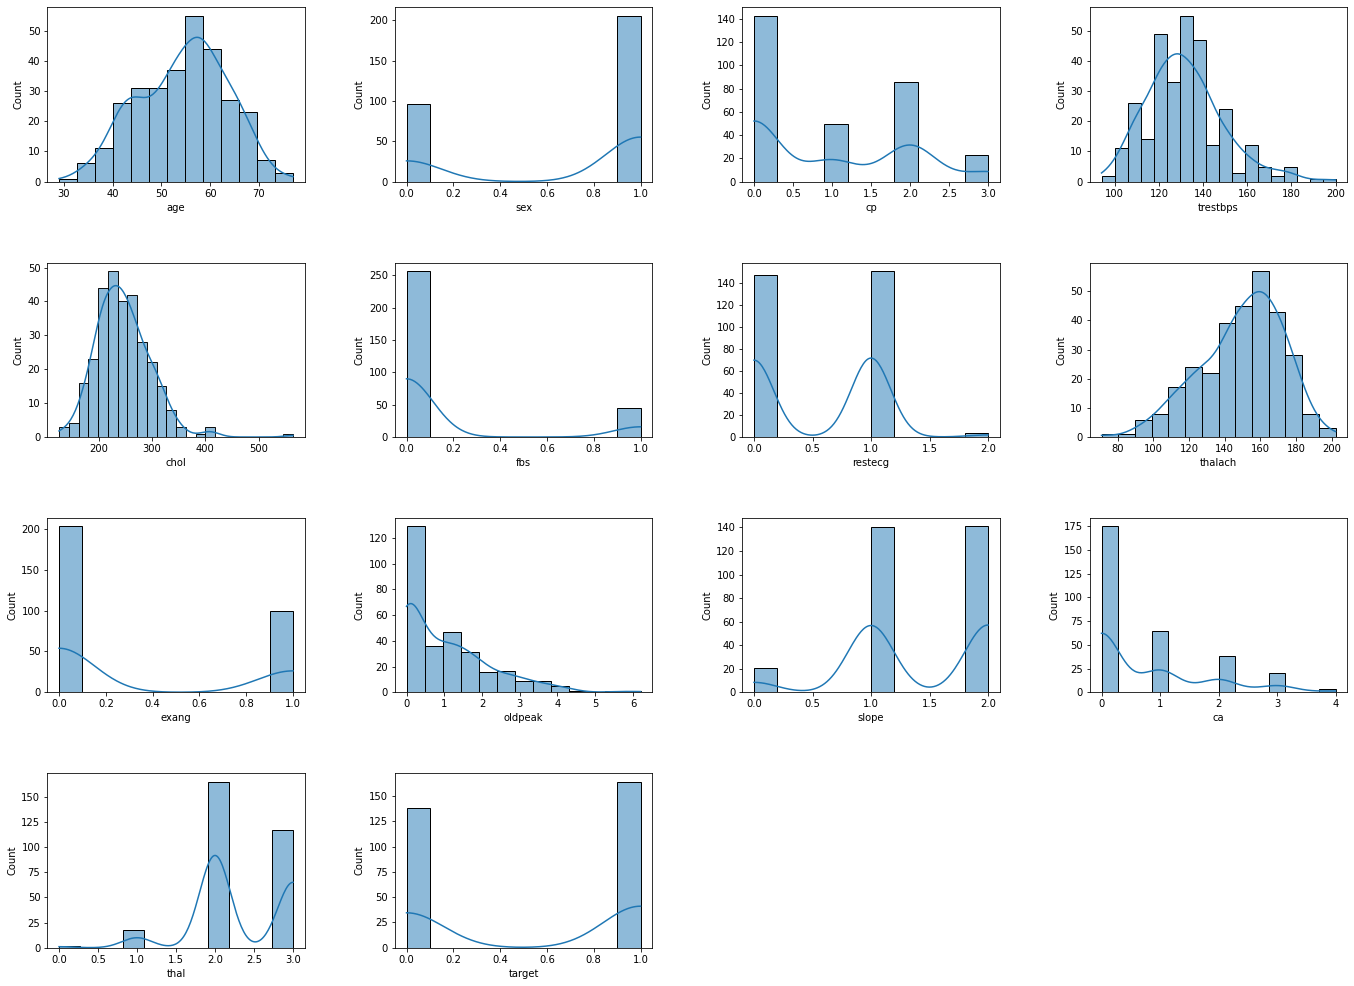

In [81]:
plt.figure(figsize=(20, 18))
for count in range(total_colums):
    ax = plt.subplot(5, 4, count+1)
    sns.histplot(x=df[columns[count]], kde=True, ax=ax)
plt.tight_layout(pad=5.0)
plt.show()


scatter plot of whole dataset

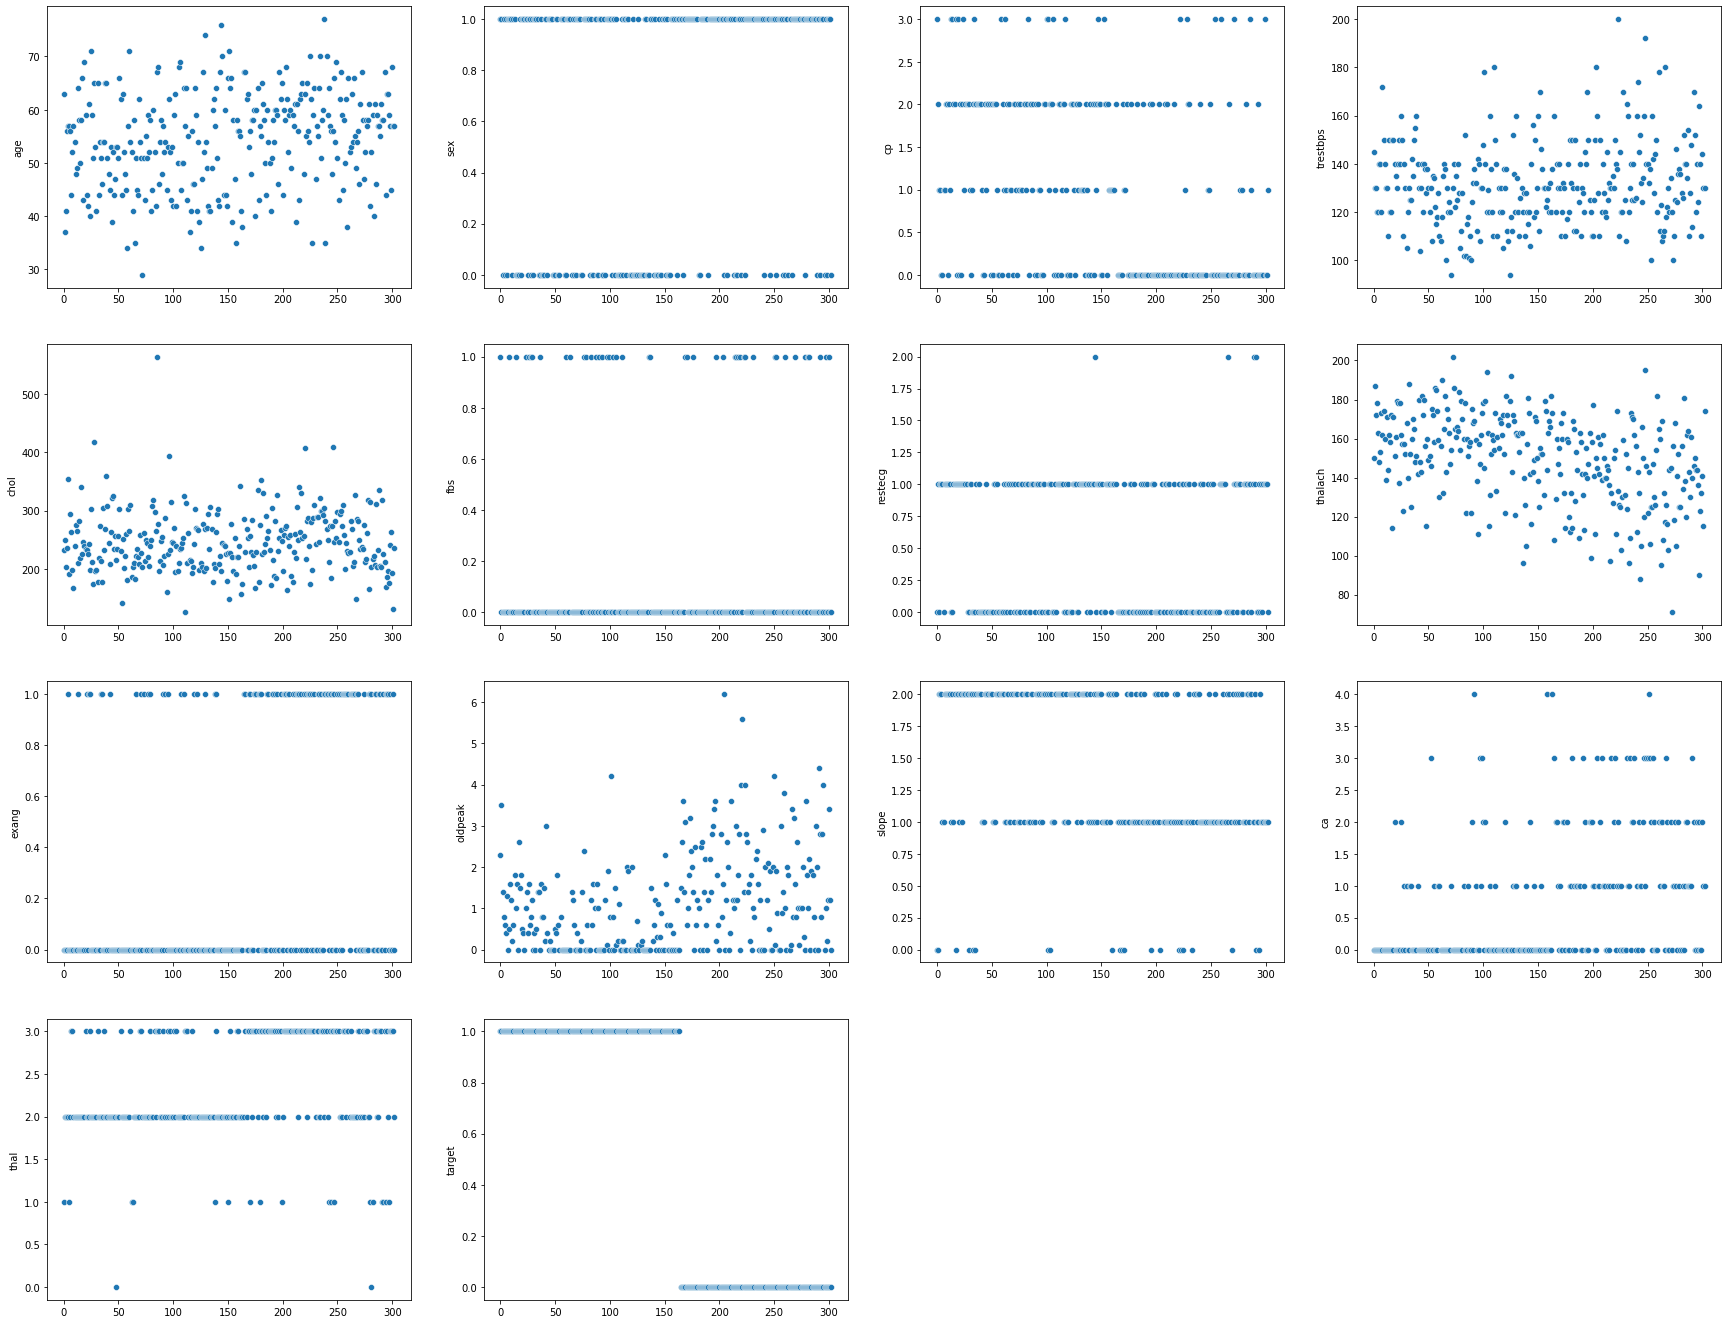

In [82]:
plt.figure(figsize=(30,30))
for i in range(total_colums):
    plt.subplot(5,4,i+1)
    sns.scatterplot(data = df[columns[i]])
plt.show()

Skewness of the data

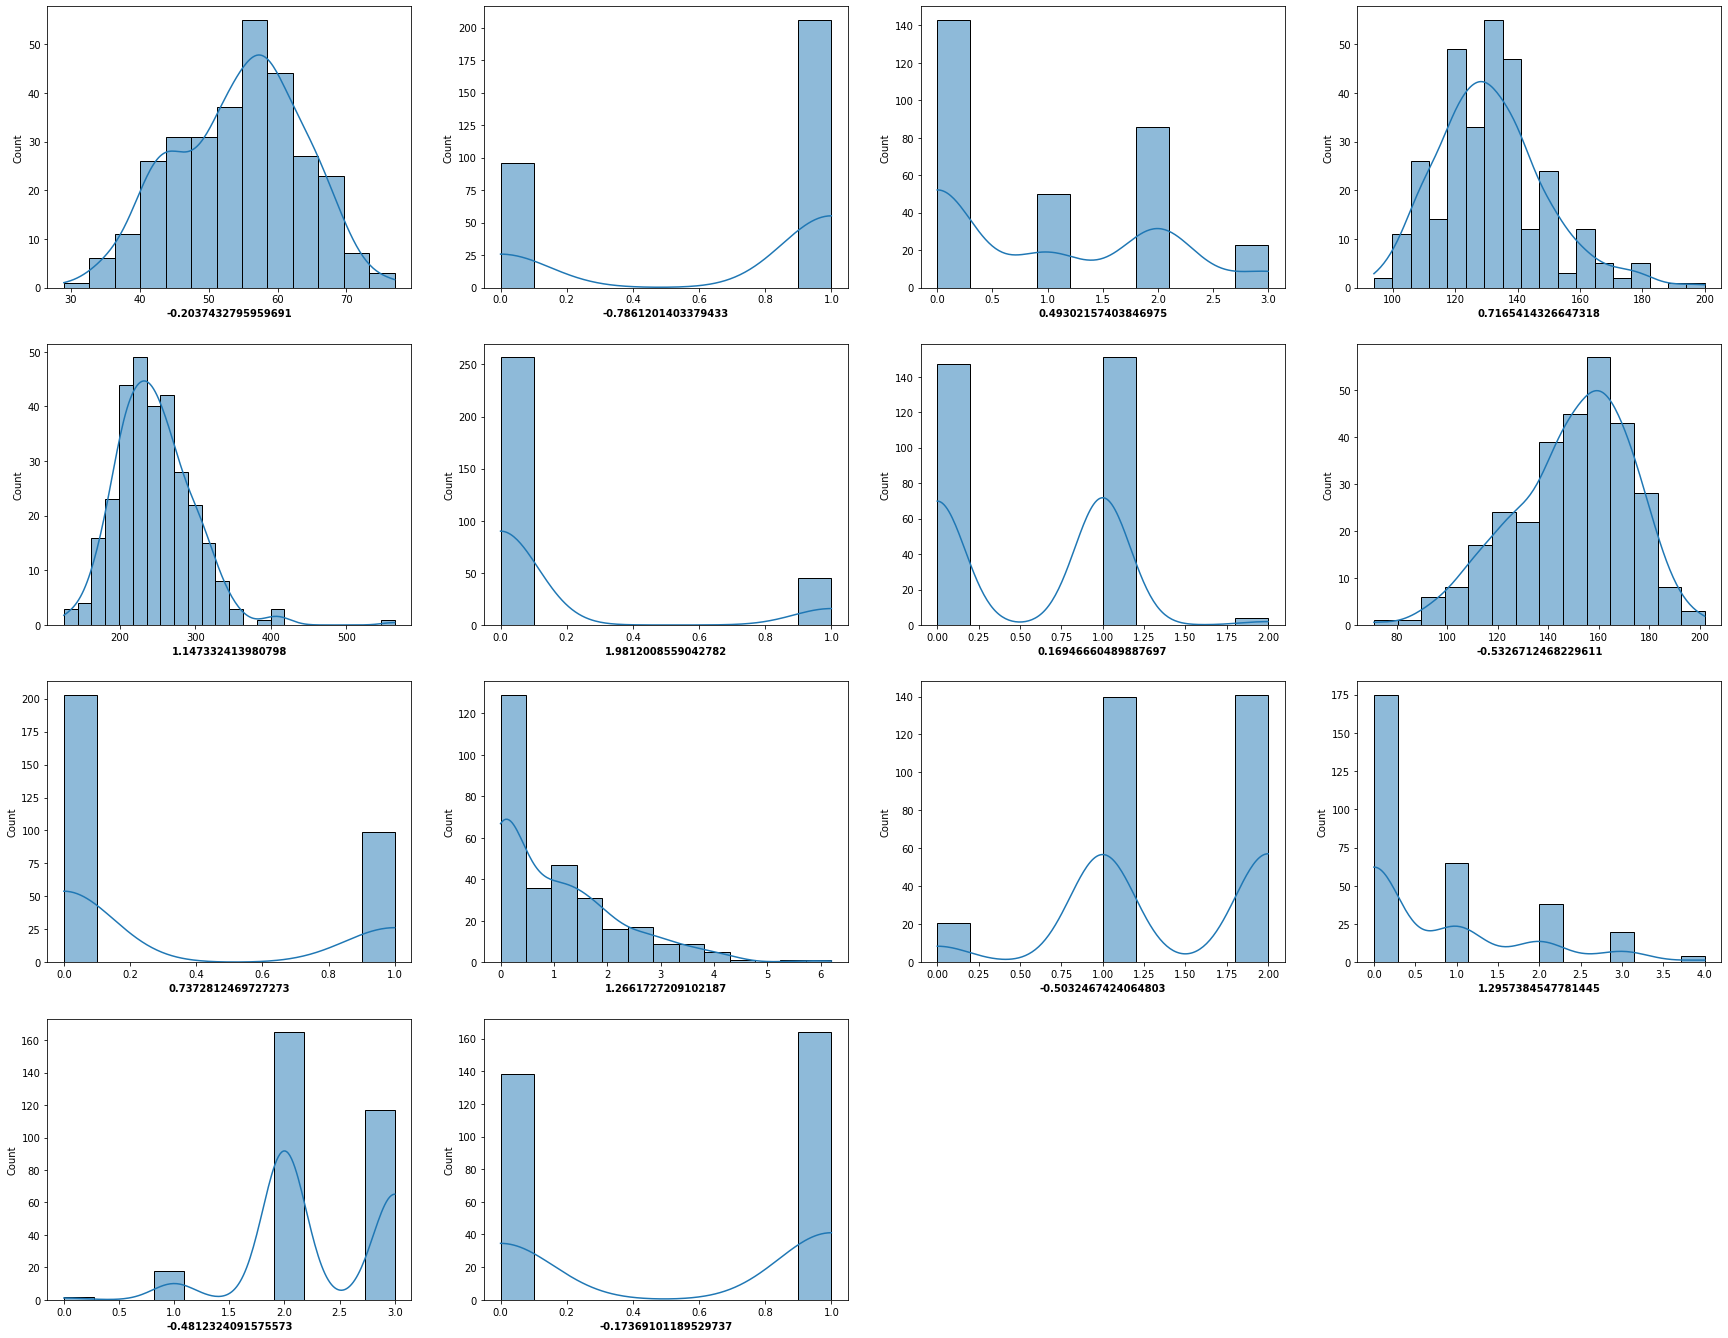

In [83]:
plt.figure(figsize=(30,30))
for i in range(total_colums):
    plt.subplot(5,4,i+1)
    sns.histplot(df[columns[i]],kde=True)
    plt.xlabel(df[columns[i]].skew(),weight = "bold")
plt.show()

In [87]:
columns = columns[:-1]

In [88]:
skewedColumns = ["age","trestbps","chol","thalach","oldpeak"]

logrithm method of skewness problem

In [89]:
logdf = pd.DataFrame()
for i in skewedColumns:
    logdf[i] = np.log(df[i]+1)

box skewness

In [90]:
boxdf = pd.DataFrame()
for i in skewedColumns:
    transformed_data, lambda_value = stats.boxcox(df[i] + 1)
    boxdf[i] = transformed_data


Square root skewness

In [91]:
sqrtdf = pd.DataFrame()
for i in skewedColumns:
    sqrtdf[i] = df[i].apply(lambda x: (x + 1)**0.5)

cube root method

In [92]:
cubedf = pd.DataFrame()
for  i in skewedColumns:
    cubedf[i] = df[i].apply(lambda x: (x+1)**(1/3))

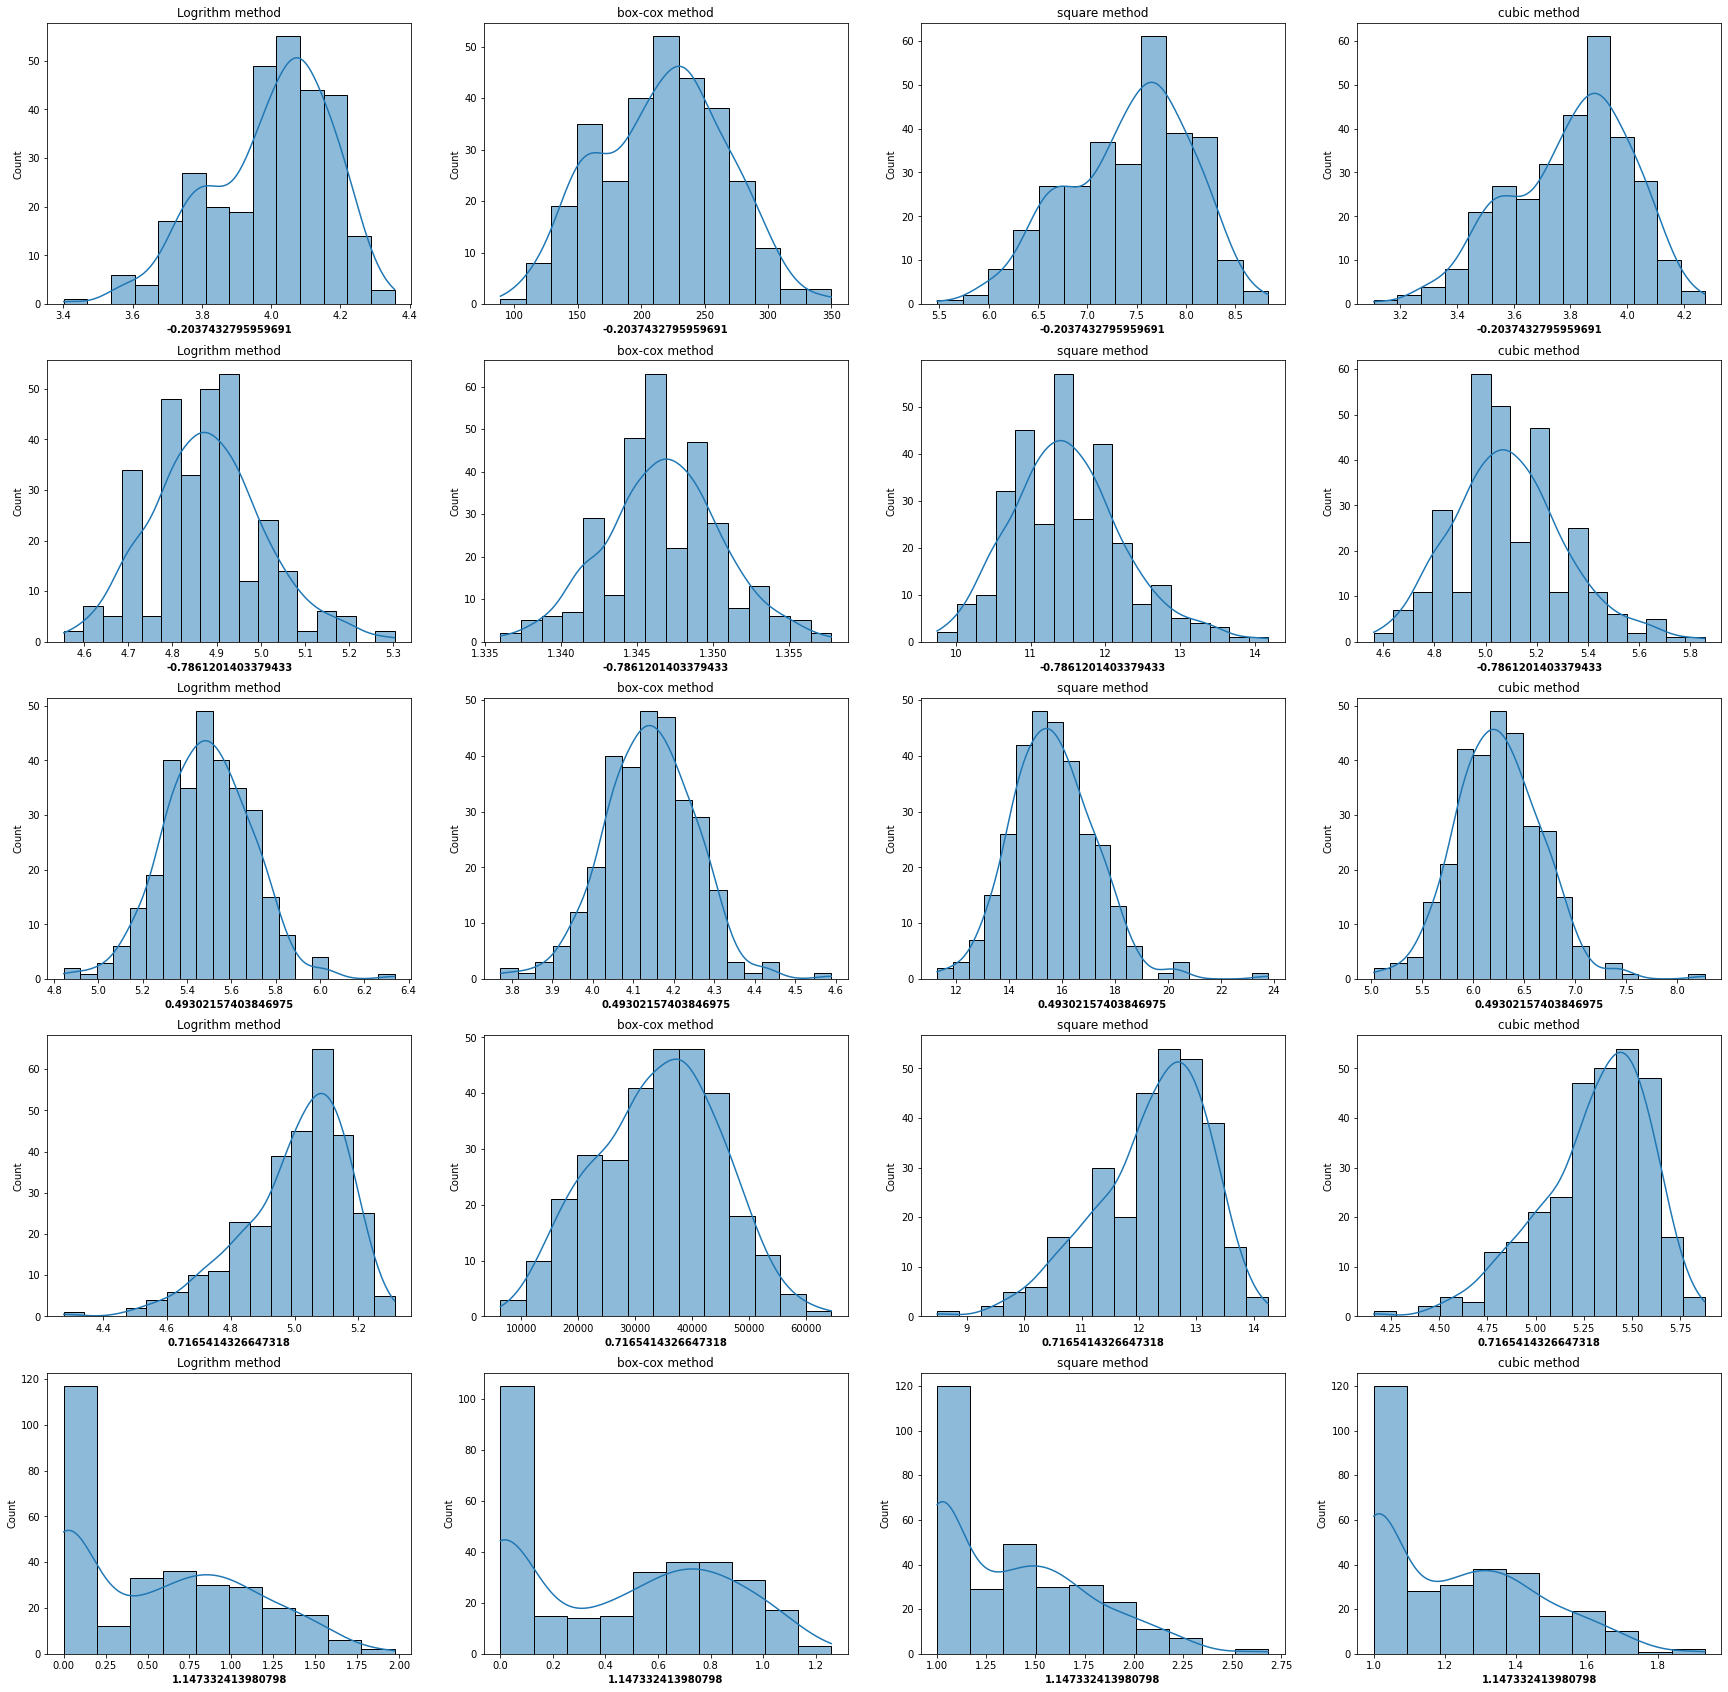

In [93]:
plt.figure(figsize=(30, 30))
for i in range(len(skewedColumns)):
        plt.subplot(5, 4, i*4+1)
        sns.histplot(logdf[skewedColumns[i]], kde=True)
        plt.title("Logrithm method")
        plt.xlabel(df[columns[i]].skew(), weight="bold")
        plt.subplot(5, 4, i*4+2)
        sns.histplot(boxdf[skewedColumns[i]], kde=True)
        plt.title("box-cox method")
        plt.xlabel(df[columns[i]].skew(), weight="bold")
        plt.subplot(5, 4, i*4+3)
        sns.histplot(sqrtdf[skewedColumns[i]], kde=True)
        plt.title("square method")
        plt.xlabel(df[columns[i]].skew(), weight="bold")
        plt.subplot(5, 4, i*4+4)
        sns.histplot(cubedf[skewedColumns[i]], kde=True)
        plt.title("cubic method")
        plt.xlabel(df[columns[i]].skew(), weight="bold")
plt.show()


With each method there is no difference in skewness of column

Outliers

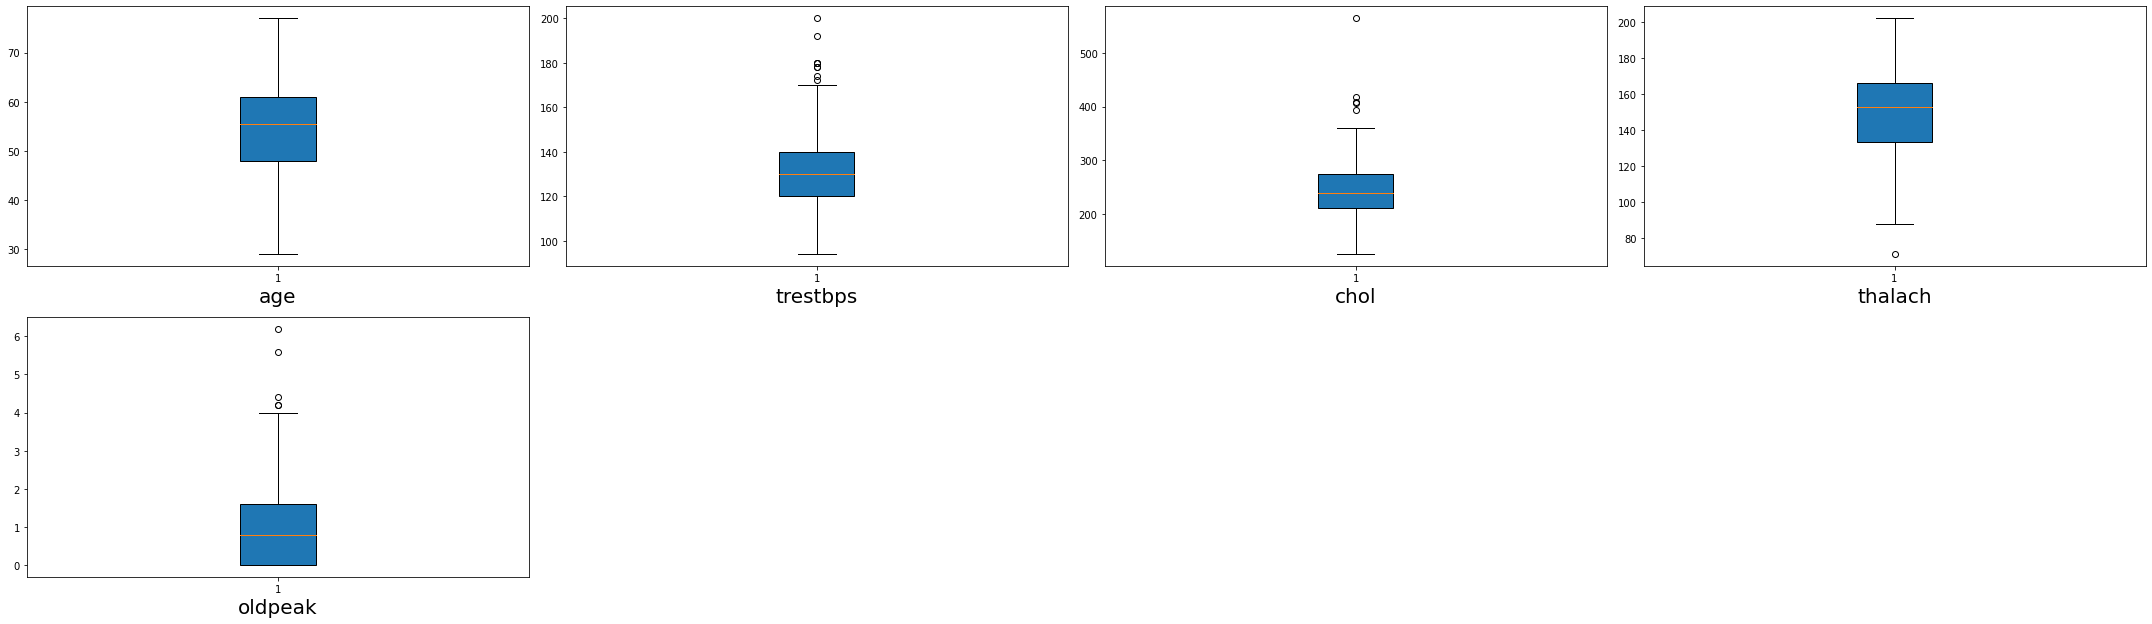

In [94]:
plt.figure(figsize=(30,60))
for i,col in enumerate(skewedColumns):
    plt.subplot(total_colums,4,i+1)
    plt.boxplot(data = df,x = df[col],patch_artist = True)
    plt.xlabel(col,fontsize=20)
plt.tight_layout()
plt.show()

winsorizing the outliers 

In [27]:
from scipy.stats.mstats import winsorize

In [28]:


lower_limit = 0.01
upper_limit = 0.99 
winsor = pd.DataFrame()
# Perform Winsorization
for i in skewedColumns:
    winsor[i] = winsorize(df[i], limits=(lower_limit, upper_limit))


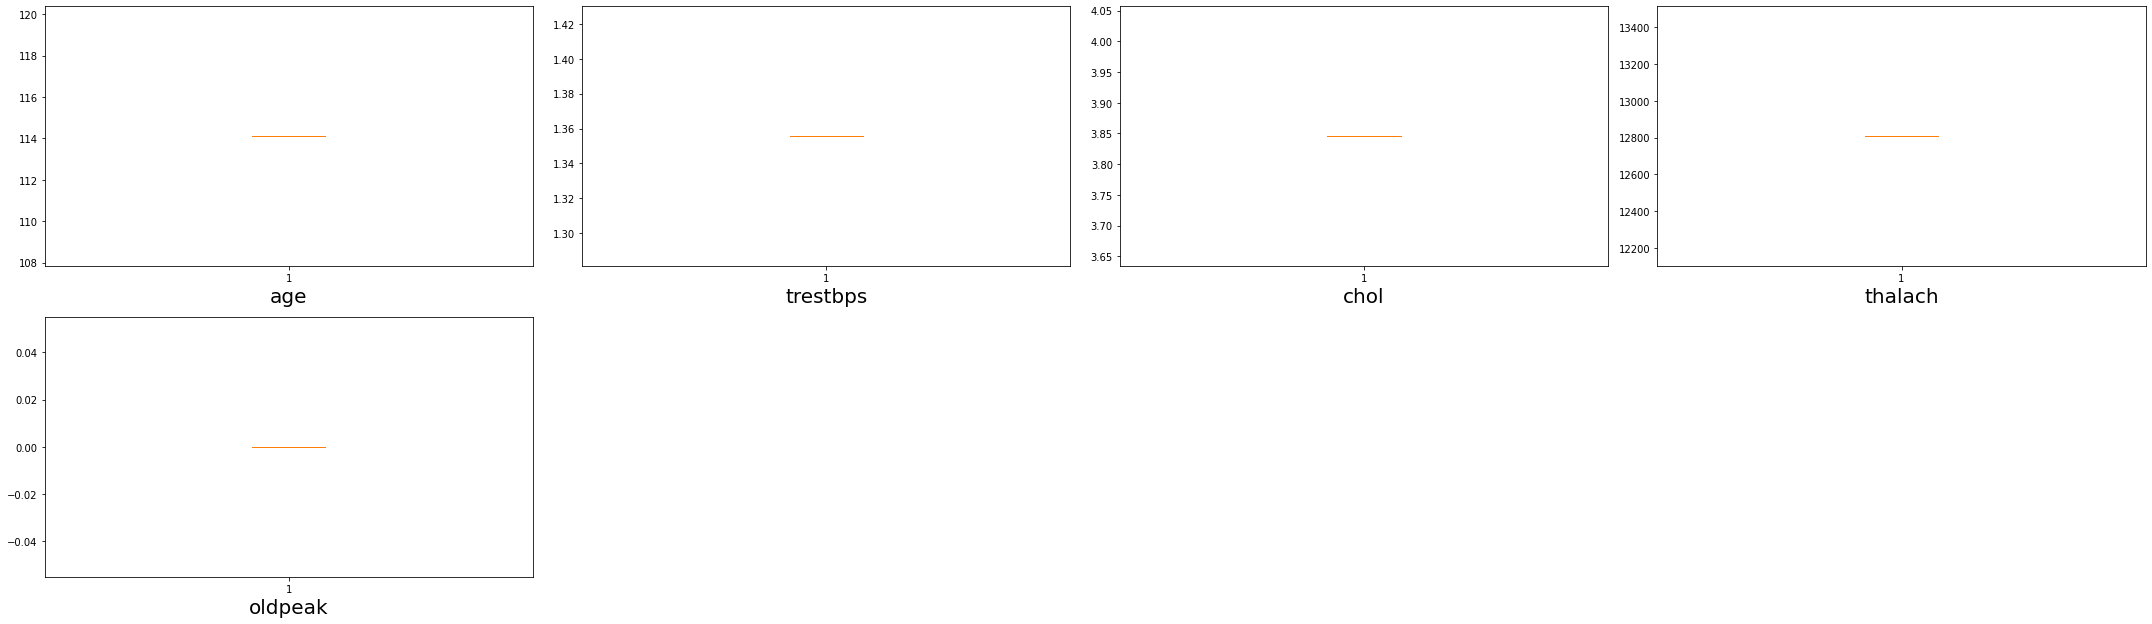

In [29]:
plt.figure(figsize=(30, 60))
for i, col in enumerate(skewedColumns):
    plt.subplot(total_colums, 4, i+1)
    plt.boxplot(data=winsor, x=winsor[col], patch_artist=True)
    plt.xlabel(col, fontsize=20)
plt.tight_layout()
plt.show()


Somehow this method fail 

In [109]:
num_bins = 10
bindf = pd.DataFrame()
for i in skewedColumns:
    bindf[i] = pd.cut(df[i],bins=num_bins,labels=False)


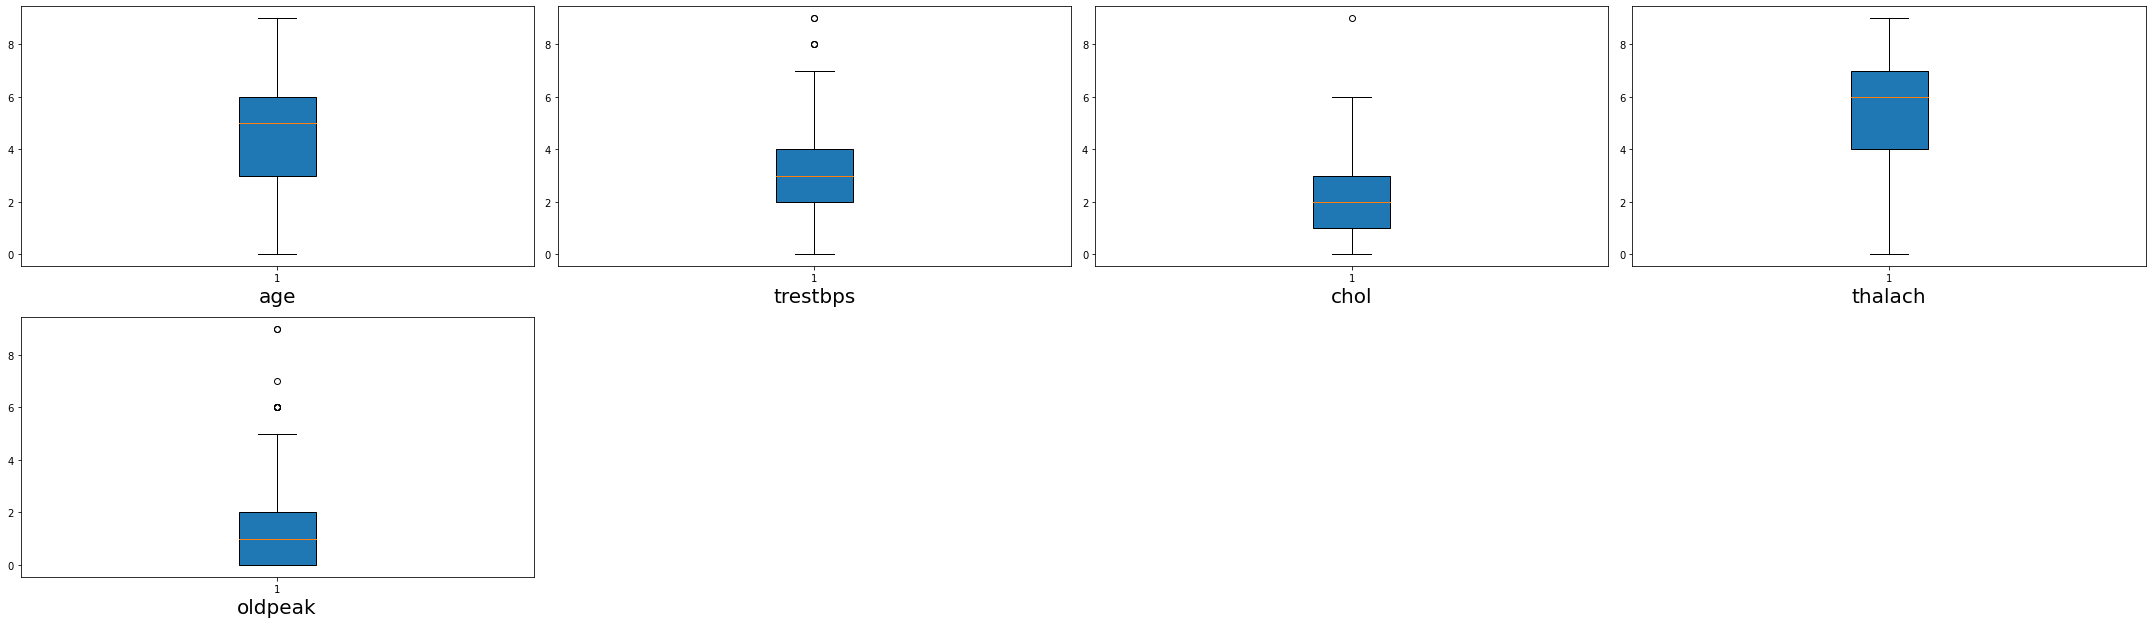

In [110]:
plt.figure(figsize=(30, 60))
for i, col in enumerate(skewedColumns):
    plt.subplot(total_colums, 4, i+1)
    plt.boxplot(data=bindf, x=bindf[col], patch_artist=True)
    plt.xlabel(col, fontsize=20)
plt.tight_layout()
plt.show()


much better 

In [111]:
for i in skewedColumns:
    df[i] = bindf[i]

In [112]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,4.794702,0.682119,0.963576,3.089404,2.248344,0.149007,0.526490,5.496689,0.327815,1.314570,1.397351,0.718543,2.314570,0.543046
std,1.890061,0.466426,1.032044,1.708476,1.223217,0.356686,0.526027,1.751598,0.470196,1.745536,0.616274,1.006748,0.613026,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,5.000000,1.000000,1.000000,3.000000,2.000000,0.000000,1.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000
75%,6.000000,1.000000,2.000000,4.000000,3.000000,0.000000,1.000000,7.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,9.000000,1.000000,3.000000,9.000000,9.000000,1.000000,2.000000,9.000000,1.000000,9.000000,2.000000,4.000000,3.000000,1.000000


Model Selection

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [146]:
# models with parameters for hyperparameter tuning

candidate_models = [
    (LogisticRegression(), {'solver': ['lbfgs'], 'C': [1.0, 0.5, 0.1]}),
    (DecisionTreeClassifier(), {'max_depth': np.arange(1,40)}),
    (RandomForestClassifier(), {'n_estimators': [
     100, 200], 'max_depth': [10, 20, 30, 40, 50]}),
    (SVC(), {'C': [1, 0.5], 'kernel': ['rbf', 'linear']}),
    (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    (GaussianNB(), {}),
    (MLPClassifier(max_iter=500), {'hidden_layer_sizes': [(100,), (50,),(25,)]})
]


In [135]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

In [136]:
X = df.drop("target",axis=1)
Y = df["target"]

In [137]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [140]:
def modelEvalute(model,params,X_train,X_test,Y_train,Y_test):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(y_pred.shape)
    accuracy = accuracy_score(Y_test, y_pred)
    return accuracy, best_model


In [152]:
best_score = 0
best_model = None

for model,params in candidate_models:
    score,fittedmodel = modelEvalute(model,params,X_train,X_test,Y_train,Y_test)
    print(f'{fittedmodel} --> {score}')
    if score > best_score:
        best_score = score
        best_model = model

(61,)
LogisticRegression(C=0.5) --> 0.8852459016393442
(61,)
DecisionTreeClassifier(max_depth=3) --> 0.8688524590163934
(61,)
RandomForestClassifier(max_depth=10) --> 0.9016393442622951
(61,)
SVC(C=0.5, kernel='linear') --> 0.8360655737704918
(61,)
KNeighborsClassifier(n_neighbors=9) --> 0.8360655737704918
(61,)
GaussianNB() --> 0.8688524590163934
(61,)
MLPClassifier(hidden_layer_sizes=(50,), max_iter=500) --> 0.8852459016393442


In [151]:
best_score

0.9016393442622951

In [153]:
best_model

RandomForestClassifier()

<div style="font-size: 36px">PREDICTIVE MODEL</div>

In [159]:
input = (45, 0, 1, 112, 160, 0, 1, 138, 0, 0, 1, 0, 2)
inputdf =  pd.DataFrame([input],columns=columns)


In [160]:
inputdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,0,1,112,160,0,1,138,0,0,1,0,2


In [163]:
prediction = fittedmodel.predict(inputdf)
if(prediction[0]):
    print("Suffering from Heart Disease")
else:
    print("Status Normal Heart condition")


Suffering from Heart Disease
